In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [19]:
dataset = pd.read_csv('200487B.csv')

In [20]:
dataset

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,32.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,32.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,23.0,32.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,3.0,137.0,40.0,35.0,168.0,43.1,0.371,33.0,1
...,...,...,...,...,...,...,...,...,...,...
763,764,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,765,2.0,122.0,70.0,27.0,32.0,36.8,0.340,27.0,0
765,766,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,767,1.0,126.0,60.0,23.0,32.0,30.1,0.349,47.0,1


In [21]:
subset_coloumns = ["Insulin",'BMI','Age']
dataset[subset_coloumns].describe().T.drop(columns=['count','mean','std'])

,min,25%,50%,75%,max
Insulin,14.0,32.000,32.0,108.5,310.0
BMI,18.2,27.575,32.0,36.3,50.0
Age,21.0,24.000,29.0,41.0,81.0


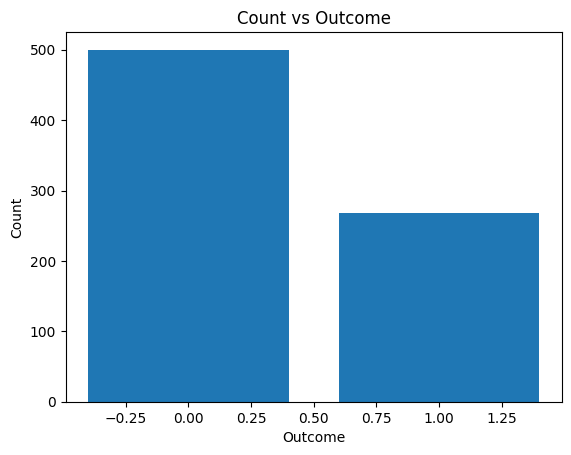

In [24]:
outcome_counts = dataset['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values)


plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count vs Outcome')

plt.show()

In [26]:
pairwise_subset = dataset.drop(columns=['Patient_ID','Outcome'])
pairwise_subset

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,32.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,32.0,26.6,0.351,31.0
2,8.0,183.0,64.0,23.0,32.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,3.0,137.0,40.0,35.0,168.0,43.1,0.371,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,32.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,23.0,32.0,30.1,0.349,47.0


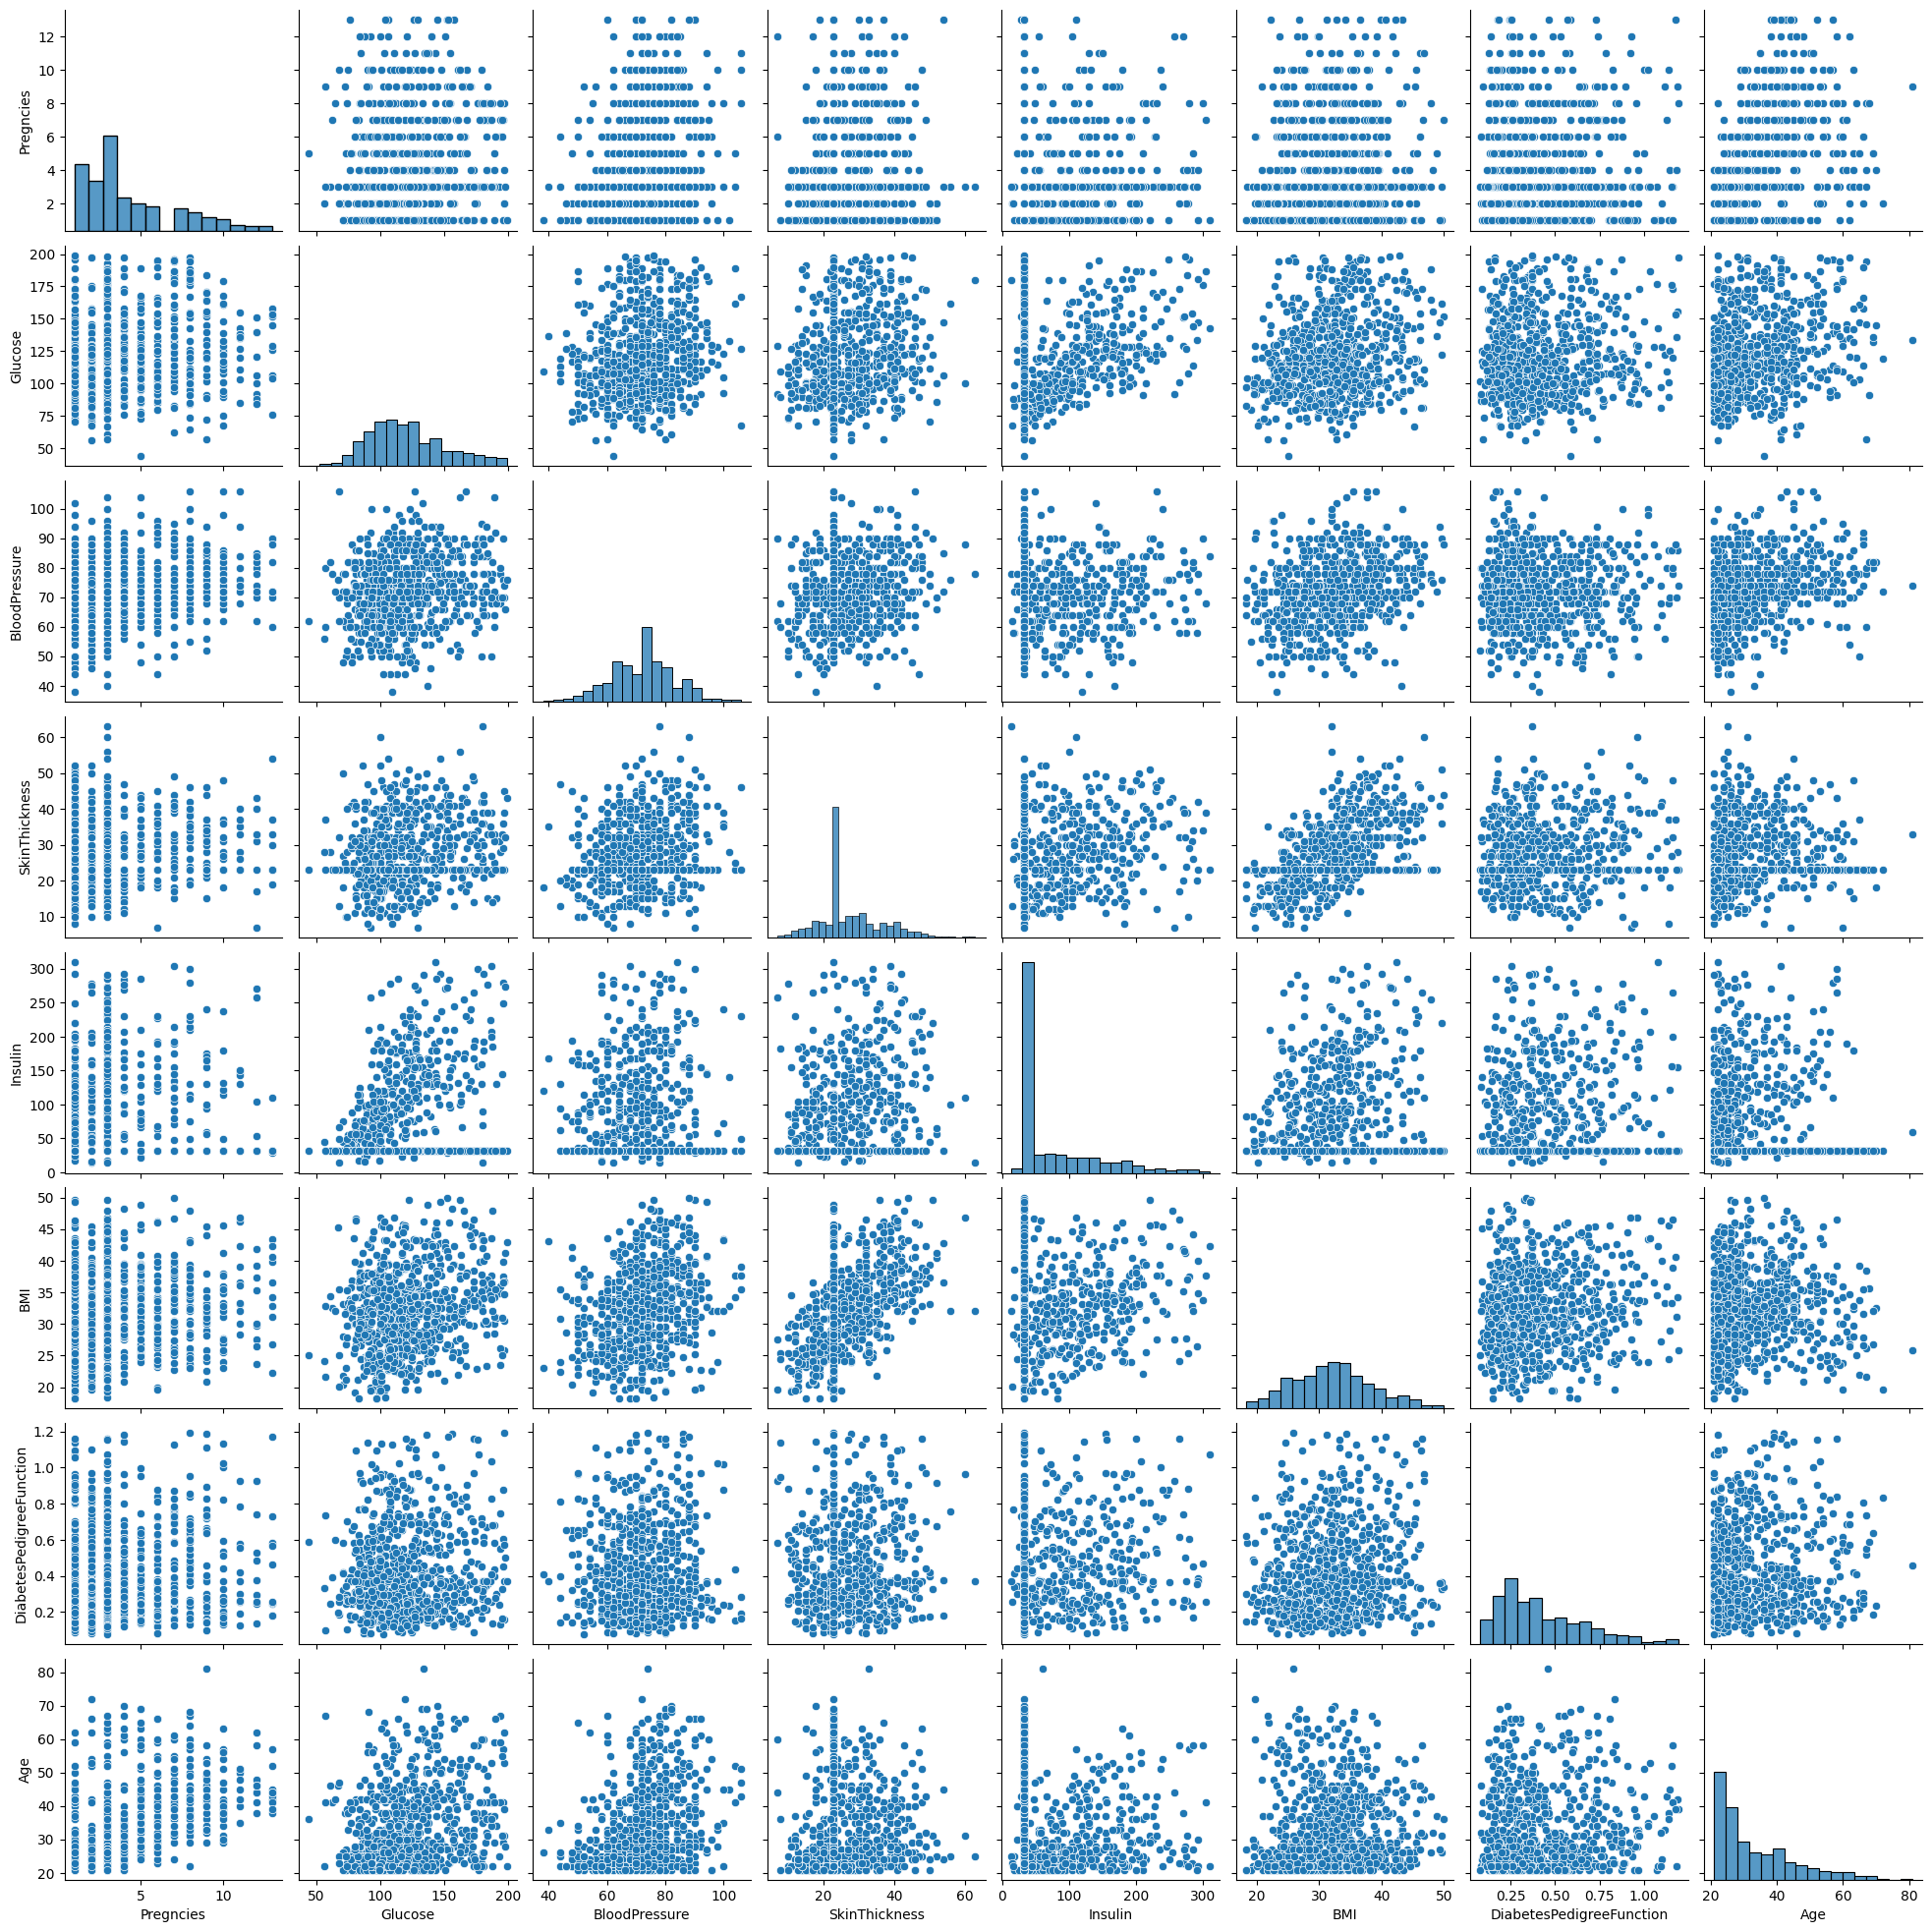

In [27]:
sns.pairplot(pairwise_subset)
plt.show()

In [31]:
cov_subset = dataset.drop(columns=['Patient_ID'])

In [32]:
cov_subset

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,32.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,32.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.0,32.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,3.0,137.0,40.0,35.0,168.0,43.1,0.371,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,32.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,23.0,32.0,30.1,0.349,47.0,1


In [36]:
covariance = cov_subset.cov()
covariance['Outcome']

Pregncies                   0.309607
Glucose                     7.177036
BloodPressure               0.883821
SkinThickness               0.772721
Insulin                     3.023461
BMI                         0.915138
DiabetesPedigreeFunction    0.018025
Age                         1.337258
Outcome                     0.227483
Name: Outcome, dtype: float64

Covariance is a statistical measure that tells us how two variables change together. It describes the relationship between two variables and whether they tend to move in the same direction (positive covariance) or in opposite directions (negative covariance).

When two variables have a positive covariance, it means that when one variable increases, the other variable tends to increase as well. Conversely, when two variables have a negative covariance, it means that as one variable increases, the other variable tends to decrease.

Hence Glucose and Insulin has considerably large positive covariance hence Glucose and Insulin are the two most influntial factors